<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 12: Object oriented programming

In this Notebook, we learn what Object Oriented Programming (OOP) is, what Classes are and how to write our own, and we learn how to make graphs using OOP and and the `matplotlib` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### A Triangle Class
So far, we have learned what is called *functional* programming. In functional programming you write or use functions that manipulate data. For example, consider the case where we have to deal with a number of triangles. For each triangle we want to be able to compute its area, and we want to be able to plot it, and fill the inside with a color. Say we have an arbitrary number of $N$ triangles. For each triangle we need to store the $(x,y)$ values of all three corner points. So we create an array for the $x$ values of the three corner point, we create an array for the three $y$ values of each corner point. Then we write a function that computes the area of a triangle given its three corners, and we write a function that plots the triangle given the three corner points, maybe fill each triangle with a color. And finally, we need to loop through all the triangles. This all sounds like a bit of work, but it is tractable. It gets more complicated when we want to change the corner point of one triangle. We have to know its place in the array, and change the correct corner point.

It gets even more complicated when we have to deal with both triangles and rectangles. Triangles have three corner points, while rectangles have four corner points. The function to compute the area of a rectangle very different, hence we have to make sure we call the area function for a triangle when we have a triangle, and the area function for a rectangle when we have a rectangle. The plotting is not much different, but we have to supply it four corner points rather than three. This gets a bit messier already. Wouldn't it be nice if it was possible to organize the data and functions in such a way that the data itself knows how to compute its area or how to plot itself? That may sound magical, but that is exactly what Object Oriented Programming does. 

Object oriented programming is, in essence, just another way of organizing your data and functions. Rather than defining and storing them separately, the data and functions are stored and bound together in what is called a *Class*. The data that are stored are called *attributes*, and the functions are called *methods*. 
This is probably easiest understood by writing a class and using it. Consider, for example, the class `Triangle` that stores the coordinates of the three corner points. Don't worry about the syntax yet (we will get back to that). Run the code below so we can start using the class. 

In [2]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2

Now that the `Triangle` class is defined, we can start creating triangles. We can call the `Triangle` class just like a function and we need to provide it tuples of the three corner points. The `Triangle` class returns what is called an object. An object is an instance of a class. Note also, that when you type 

`Triangle(` 

and hit [shift][tab], a small box pops up showing what input arguments are expected (you don't need to provide the `self` argument; more on that later). Let's create a triangle with corners (0,1), (3,0) and (2,3).

In [3]:
t1 = Triangle((0, 1), (3, 0), (2, 3))

`t1` is now an instance of the class `Triangle`. We simply say that `t1` is a triangle. We have stored the three corner points of the triangle. Hence, each `Triangle` object has three attributes. You can find out what attributes an object has by typing 

`t1.` 

(don't forget the dot) and then hit the [TAB] key. The attributes can be accessed with the *dot syntax*.

In [4]:
print(t1)  # not very useful
print(t1.x0y0)  # first corner point
print(t1.x1y1)  # second corner point
print(t1.x2y2)  # third corner point

(0, 1)
(3, 0)
(2, 3)


Let's get back to the `Triangle` class. When we call the `Triangle` class (official lingo: we create a `Triangle` object, or more officially yet: we create an instance of the `Triangle` class), Python calls the `__init__` function. This function is called the *constructor*. It constructs an object. In the constructor you define what arguments need to be provided to create a triangle. The name `__init__` (that is *two* underscores before and after the word `init`) is required (it is one of the few unfortunate name choices of the Python language). The first argument is `self` and tells Python what the object itself is called inside the class. 

We saw above that typing `print(t1)` returns a meaningless message. This can be resolved by including a representation function, which needs to be called `__repr__`. This function is called when the object is printed (or converted to a string).

In [5]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
    def __repr__(self):
        return f'Triangle with corners: {self.x0y0}, {self.x1y1}, {self.x2y2}'
    
t1 = Triangle((0, 1), (3, 0), (2, 3))
print(t1)

Triangle with corners: (0, 1), (3, 0), (2, 3)


In the Triangle class, the three corner points are stored as three tuples. Hence, the $x$ value of the first corner point is `self.x0y0[0]` and the $y$ value is `self.x0y0[1]`. It may be useful to store one array of the three $x$ values of the three corner points and one array of the three $y$ values of the corner points. If those are stored, it is fairly easy to compute the area $A$ of a triangle using the following formula

$A = \frac{1}{2}|(x_0-x_2)(y_1-y_0) - (x_0-x_1)(y_2-y_0)|$

Let's modify the `Triangle` class to include these two additional attributes and an `area` function

In [6]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
        self.x = np.array([self.x0y0[0], self.x1y1[0], self.x2y2[0]])
        self.y = np.array([self.x0y0[1], self.x1y1[1], self.x2y2[1]])
    def __repr__(self):
        return f'Triangle with corners: {self.x0y0}, {self.x1y1}, {self.x2y2}'
    def area(self):
        A = 0.5 * np.abs((self.x[0] - self.x[2]) * (self.y[1] - self.y[0]) - 
                         (self.x[0] - self.x[1]) * (self.y[2] - self.y[0]))
        return A

Note that the `area` function gets passed the object `self`. Once it knows what `self` is, it has access to all its attributes and functions. We can now create a `Triangle` object and compute its area as follows (don't forget to run the new `Triangle` class above first)

In [7]:
t1 = Triangle( (0,1), (3,0), (2,3) )
print(t1.area())

4.0


In the code above, the `area` function is called using the *dot* syntax, where `self` in the function is automatically replaced with the variable before the dot (in this case `t1`). The *dot* syntax is short for the much longer

In [8]:
print(Triangle.area(t1))

4.0


Note that classes are very convenient, as the triangle object knows what its own corner points are. When typing `t1.`[TAB], not only all attributes but also all functions of an object are shown. Another way is to use the `dir` function. 

In [9]:
dir(t1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'area',
 'x',
 'x0y0',
 'x1y1',
 'x2y2',
 'y']

Let's expand the `Triangle` class by adding a function that plots a filled triangle. The color of the triangle is supplied with a keyword argument in the constructor. Hence, when it is not provided, the default value will be used.

In [10]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2, color='b'):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
        self.x = np.array([self.x0y0[0], self.x1y1[0], self.x2y2[0]])
        self.y = np.array([self.x0y0[1], self.x1y1[1], self.x2y2[1]])
        self.color = color
    def __repr__(self):
        return f'Triangle with corners: {self.x0y0}, {self.x1y1}, {self.x2y2}'
    def area(self):
        A = 0.5 * np.abs((self.x[0]-self.x[2])*(self.y[1]-self.y[0]) - 
                         (self.x[0]-self.x[1])*(self.y[2]-self.y[0]))
        return A
    def plot(self):
        plt.fill(self.x, self.y, color=self.color)

Let's create three triangles and store them in a list. Then we loop through the triangles in the list and plot them in one graph. Note how we can loop through the triangles in the list `tlist` as follows:

`for t in tlist:`

So every time we go through the loop, `t` is the next triangle in the list `tlist`.

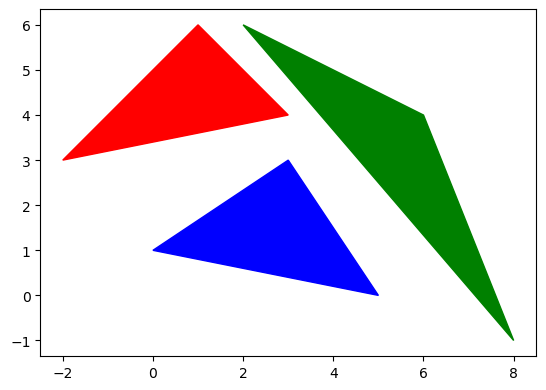

In [11]:
tlist = []  # start with an empty list
t1 = Triangle((0, 1), (5, 0), (3, 3), 'b')
tlist.append(t1)  # add t1 to the list
t2 = Triangle((3, 4), (1, 6), (-2, 3), 'r')
tlist.append(t2)
t3 = Triangle((8, -1), (6, 4), (2, 6), 'g')
tlist.append(t3)
plt.figure()
for t in tlist:
    t.plot()
plt.axis('scaled');

Similarly, the total area of the three triangles is

In [12]:
areatot = 0.0
for t in tlist:
    areatot += t.area()
print(f'total area: {areatot}')

total area: 20.5


### Exercise 1. <a name="back1"></a>A Circle class
Create a `Circle` class that stores the $(x,y)$ coordinates of the center of a circle and the radius $R$ of the circle. Class functions are: `area`, which returns the area of the circle and `plot`, which plots a filled circle using a transparancy of 0.5 (i.e., use keyword argument `alpha=0.5` in the `fill` function). The input argument of the `plot` function is a radius $R^*$. When the radius of the circle is less than $R^*$, fill the circle with the color blue. When the radius of the circle is larger than or equal to $R^*$, fill the circle with the color red. Demonstrate that your `Circle` class works by loading the text file `circle_data.txt`. This file contains the $x$, $y$, and $R$ data for 20 circles. Compute and report the total area of all the circles in the file. Make a plot of the 20 circles to demonstrate that the colors are assigned correctly, using $R^*=1$.

<a href="#ex1answer">Answers to Exercise 1</a>

### Exercise 2. <a name="back2"></a>Flow to a set of extraction and injection wells
Consider an extraction well with a discharge $Q$. The well is located at $(x,y)=(x_w,y_w)$ in an aquifer with thickness $H$ and hydraulic conductivity $k$. The head at a radial distance $R$ from the well is fixed to $h_0$. The groundwater head $h$ decreases towards the well as (e.g., Eq. 11.4 in Verruijt (2012) Soil Mechanics)

$$h = \frac{Q}{2\pi kH} \ln\left(\frac{r}{R}\right) + h_0$$

where $r$ is the radial distance from the well $r=\sqrt{(x-x_w)^2+(y-y_w)^2}$. 

Next, consider a system with $N$ extraction and injection wells near the center of a large area; the sum of the discharges of all extraction and injection wells is zero (i.e., all water that is extracted is also injected; this is often the case for pump-and-treat systems, cooling systems, building pit dewatering, etc.). The change in head caused by all wells together is approximately zero along a circle with radius $R$. The head distribution for a system of $N$ wells may be written as (e.g., Eq. 11.9 in Verruijt, 2010, Soil Mechanics)

$$h = \sum_{n=1}^N \frac{Q_n}{2\pi kH} \ln\left(\frac{r_n}{R}\right)$$

where $Q_n$ is the discharge of well $n$ (positive for extraction) located at $(x_n,y_n)$, and $r_n=\sqrt{(x-x_n)^2+(y-y_n)^2}$ is the distance from well $n$.

Write a class `Well` that stores the location of a well, the discharge of a well, the radius $R$ of the circular area, and the aquifer parameters $k$ and $H$. The well class has one method called `head`, which takes $x,y$ coordinates as input arguments and returns the contribution of the well to the head at $x,y$ (the term $Q_n/(2\pi kH)\ln(r_n/R)$ in the summation above). 

Test your implementation for an aquifer with $k=2$ m/d, $H=10$ m, $R=1000$ m, and a system of three wells: one extraction well (with postive discharge) and two injection wells (with negative discharge). 

* $(x_w,y_w)=(0,0)$, $Q=100$ m$^3$/d
* $(x_w,y_w)=(-20,0)$, $Q=-50$ m$^3$/d
* $(x_w,y_w)=(20,0)$, $Q=-50$ m$^3$/d

When your implementation is correct, the head caused by the three wells at $(x,y)=(20,5)$ is 0.2968 m. Plot the variation of the head along the line $y=1$ for $x$ varying from -40 to +40.

<a href="#ex2answer">Answers to Exercise 2</a>

### Arrays are objects
Now that you have learned about OOP, you may realize that many of the Python features you use are actually based on OOP. For example, when you create an array, the array is an object. 

In [13]:
x = np.arange(12)
print('type of x:', type(x))

type of x: <class 'numpy.ndarray'>


Hence, an array has attributes and class methods associated with it. You can type `dir(x)` to find out all attributes and methods (there are many). Some of the attributes of an array include the number of dimensions and the shape. You can even change the shape (as long as you make sure the shape fits the array) by modifying the shape attribute.

In [14]:
print(f'number of dimensions of x: {x.ndim}')
print(f'shape of x: {x.shape}')
x.shape = (4, 3)
print(f'new shape of x: {x.shape}')
print(x)

number of dimensions of x: 1
shape of x: (12,)
new shape of x: (4, 3)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


An array also has a number of functions, including a function that returns the mean value of the array or the maximum value of an array.

In [15]:
print(f'mean of x: {x.mean()}')
print(f'max  of x: {x.max()}')

mean of x: 5.5
max  of x: 11


### Plotting features are objects
All plotting commands we have used so far are functions that are part of the `matplotlib` package. Not surpringly, `matplotlib` has an object-oriented design. Plots may be created by making use of the object-oriented structure. This requires a bit of additional typing, but in the end, we gain a lot of additional flexibility.

Using the OO syntax, we first create a `figure` object and specify the size using the `figsize` keyword argument (the size of the figure is specified in inches), then we add an axis to the figure with the `add_axes` command (note that it is `axes` with an `e`) by specifying the *relative* location of the axis in the figure. The location of the left, bottom, width, and height are specified in relative coordinates (both the horizontal and vertical directions run from 0 to 1). To plot, we use the `plot` method of the axis.

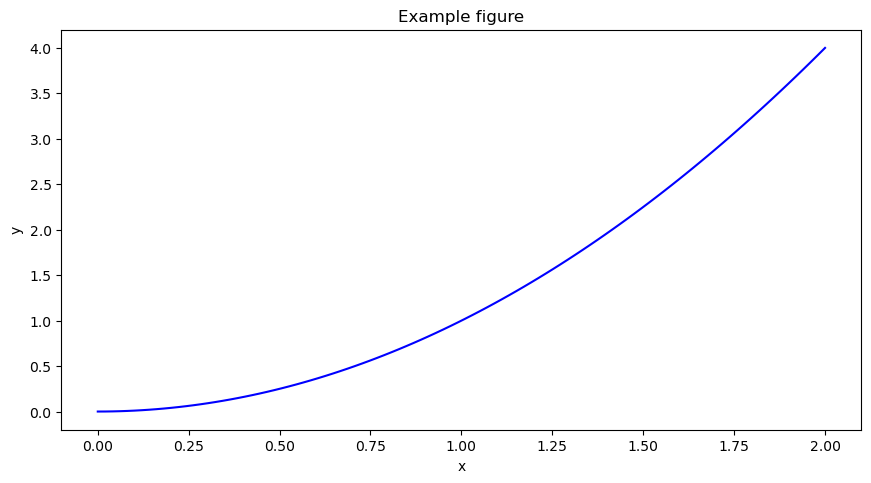

In [16]:
x = np.linspace(0, 2, 100)
y = x ** 2
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(x, y, 'b')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Example figure');

We can add as many axes to the figure as we want and decide exactly where each axis is located. 

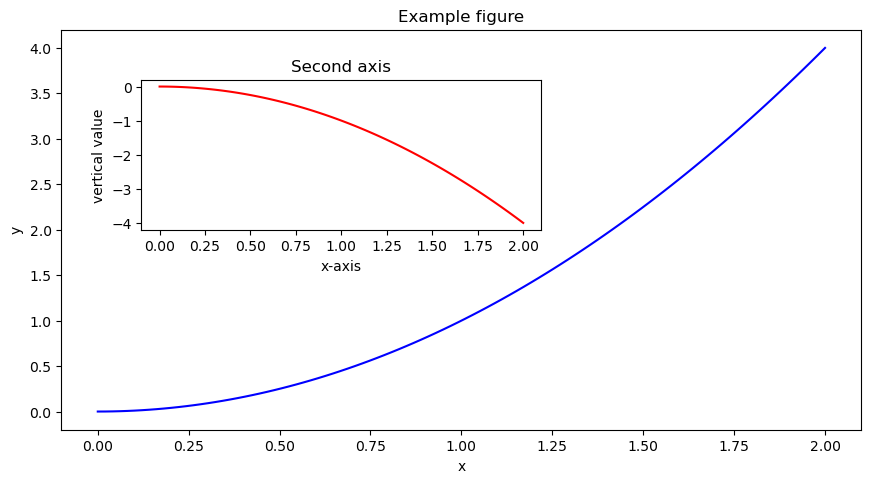

In [17]:
x = np.linspace(0, 2, 100)
y = x ** 2
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(x, y, 'b')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Example figure')
ax2 = fig.add_axes([0.18, 0.5, 0.4, 0.3])
ax2.plot(x,-y,'r')
ax2.set_xlabel('x-axis')
ax2.set_ylabel('vertical value')
ax2.set_title('Second axis');

Another way to add an axis to a figure is using the `add_subplot` function, which works similar to the `np.subplot` functin. If you want just one axis of default size, you simply specify `111` (1 row, 1 column, figure 1).

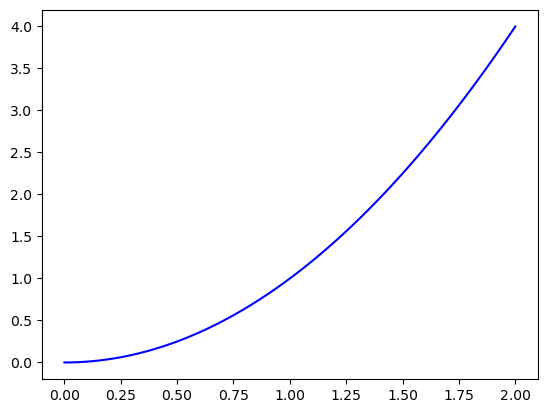

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y, 'b');

If you want fancier options to create a grid of graphs, use the `subplot2grid` function, which allows you define a grid of graphs (3 by 3 in the example below). Then you can add graphs by specifying the row and column with the second argument (these are 0 based, so the upper left-hand corner is `loc=(0, 0)`). And you can, optionally, specify that a graph spans multiple graphs in the row or column direction. 

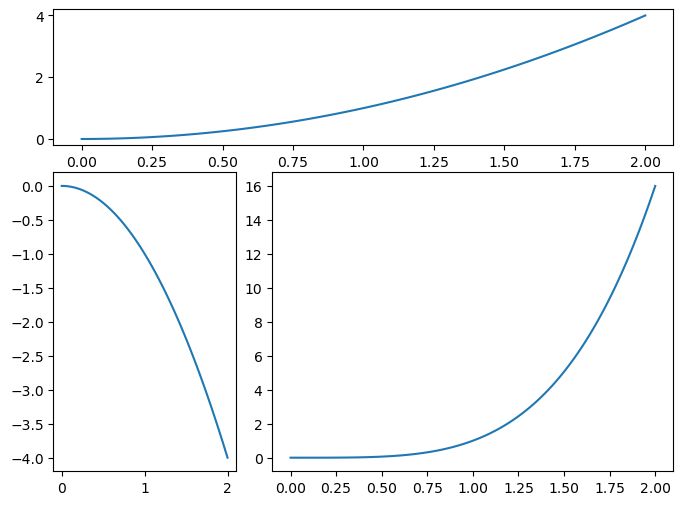

In [19]:
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 1), rowspan=2, colspan=2)
ax1.plot(x, y)
ax2.plot(x, -y)
ax3.plot(x, y ** 2)

### Matplotlib patches
The plotting package `matplotlib` includes a set of classes to define shapes, which are called *patches* in `matplotlib`. There are patches for many different shapes including circles, ellipses, polygons, wedges, and arrows. Here we learn how to draw these patches. 

The process for adding a patch to a graph is always the same. First you create an axis, then you create a patch object and you add the patch object to the axis. Each patch object has a few input arguments and a number of keyword arguments. The keyword arguments include: `ec` for edge color, `fc` for face color, `alpha` for transparancy, and `zorder` for the order in which they are plotted (the patch with the highest `zorder` value lies on top). The names of all patch classes start with a capital: `Circle`, `Ellipse`, `Polygon`, `Wedge`, `Arrow` (in fact, it is customary in Python to have all classes start with a capital). You need to import these classes from `matplotlib.patches` to be able to use them. Use the help system to learn about the required input arguments. The graph below contains two circles, where the smaller one is on top of the larger one. The face color of the graph is set to the same color as the small circle, so that it looks like the large circle has a hole. The aspect ratio of the axis is set to `'equal'` when the axis is created. The `autoscale` function needs to be called to set the limits of the axis such that the patches fit exactly in the axis. Alternatively, you can call the `ax.set_xlim` and `ax.set_ylim` functions to select limits of your own choice.

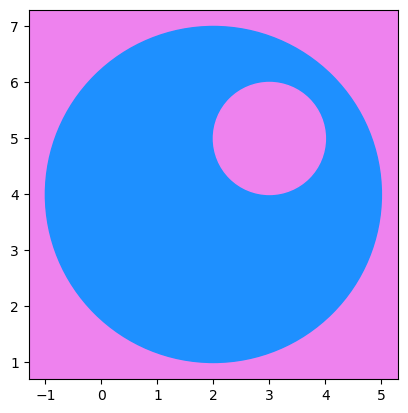

In [20]:
from matplotlib.patches import Circle
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='violet', aspect='equal')
small = Circle(xy=(3, 5), radius=1, fc='violet', ec='violet', zorder=2)
big = Circle(xy=(2, 4), radius=3, fc='dodgerblue', ec='dodgerblue', zorder=1)
ax.add_patch(small)
ax.add_patch(big)
ax.autoscale()

### Exercise 3. <a name="back3"></a>Matplotlib patches
Write Python code to create the figure shown below using `matplotlib` patches. Use colors of your own choice. Write 'circle', 'ellipse', etc. inside the corresponding patches using the `ax.text` function.

<img src="http://i.imgur.com/ObuPLD7.png" alt="Patches" width=800pt>

<a href="#ex3answer">Answers to Exercise 3</a>

### Exercise 4. <a name="back4"></a> 3D - Spiral

Consider the $x$, $y$, $z$ coordinates of a three-dimensional spiral

$$x(t) = a\cos(t)$$
$$y(t) = a\sin(t)$$ 
$$z(t) = bt$$

where $a$ and $b$ are constants and $t$ is a parameter that varies. Write a function that takes $a$, $b$, and an array $t$ as input arguments and returns arrays $x$, $y$, and $z$.  

Next, import the 3D plotting capabilities of `matplotlib` with the command 
`from mpl_toolkits.mplot3d import Axes3D`. 
Plot a three-dimensional curve by specifying the keyword `projection='3d'` when creating the axis. You can than plot on that axis using `ax.plot` by simply specifying $x$, $y$, *and* $z$. Plot two spirals on the same graph. Use $a=4$ an $b=1$ for the first spiral, and $a=2$, $b=2$ for the second spiral; vary $t$ form 0 to 20 with 100 points. 

<a href="#ex4answer">Answers to Exercise 4</a>

### Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

total area: 67.89637035591662


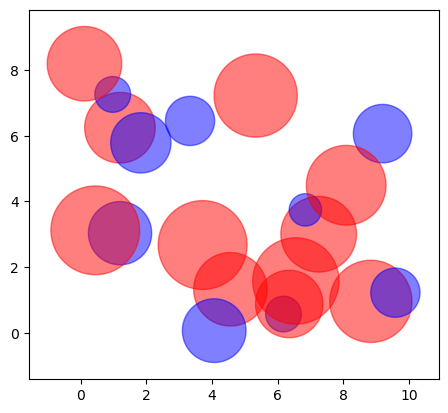

In [21]:
class Circle:
    def __init__(self, x0, y0, R):
        self.x0 = x0
        self.y0 = y0
        self.R = R
    def area(self):
        A = np.pi * self.R ** 2
        return A
    def plot(self, Rstar):
        if self.R < Rstar:
            color = 'b'
        else:
            color = 'r'
        alpha = np.linspace(0, 2 * np.pi, 100)
        plt.fill(self.x0 + self.R * np.cos(alpha), self.y0 + self.R * np.sin(alpha), 
                 color=color, alpha=0.5)

data = np.loadtxt('circle_data.txt')
clist = []
for i in range(20):
    c = Circle(data[i, 0], data[i, 1], data[i, 2])
    clist.append(c)
areatot = 0.0
plt.figure()
for c in clist:
    areatot += c.area()
    c.plot(1.0)
plt.axis('scaled')
print(f'total area: {areatot}')

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

head at (20, 5) is: 0.2968318108714483


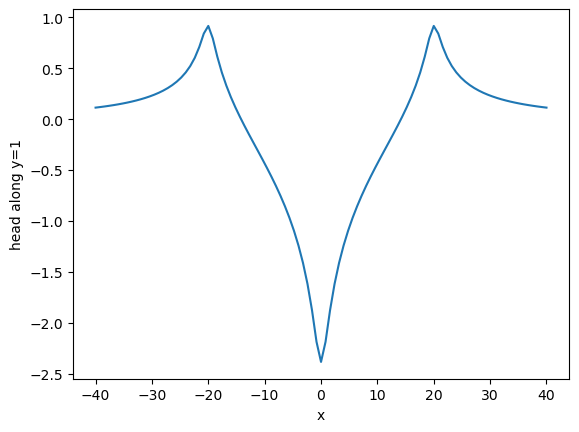

In [22]:
class Well:
    def __init__(self, xw, yw, Q, k, H, R):
        self.xw = xw
        self.yw = yw
        self.Q = Q
        self.k = k
        self.H = H
        self.R = R
    def head(self, x, y):
        r = np.sqrt((x - self.xw) ** 2 + (y - self.yw) ** 2)
        h = self.Q / (2 * np.pi * self.k * self.H) * np.log(r / self.R)
        return h
    
w1 = Well(0, 0, 100, 2, 10, 1000)
w2 = Well(-20, 0, -50, 2, 10, 1000)
w3 = Well(20, 0, -50, 2, 10, 1000)
wells = [w1, w2, w3]

h = 0.0
for w in wells:
    h += w.head(20, 5)
print(f'head at (20, 5) is: {h}')

x = np.linspace(-40, 40, 101)
h = np.zeros_like(x)
for w in wells:
    h += w.head(x, 1)
plt.figure()
plt.plot(x, h)
plt.xlabel('x')
plt.ylabel('head along y=1');

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

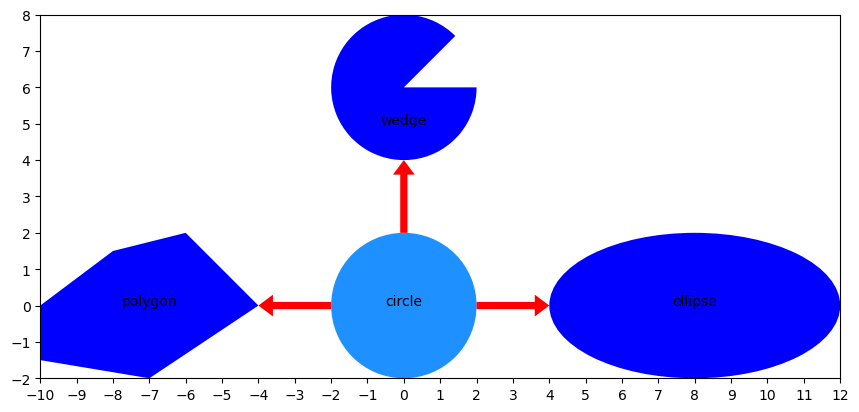

In [23]:
from matplotlib.patches import Circle, Ellipse, Polygon, Arrow, Wedge
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([.1, .1, .8, .8], aspect='equal')
c1 = Circle(xy=(0, 0), radius=2, fc='dodgerblue')
ax.add_patch(c1)
a1 = Arrow(x=2, y=0, dx=2, dy=0, fc='r')
ax.add_patch(a1)
e1 = Ellipse(xy=(8, 0), width=8, height=4, fc='b')
ax.add_patch(e1)
a2 = Arrow(x=0, y=2, dx=0, dy=2, fc='r')
ax.add_patch(a2)
w1 = Wedge(center=(0, 6), r=2, theta1=45, theta2=0, fc='b')
ax.add_patch(w1)
a3 = Arrow(x=-2, y=0, dx=-2, dy=0, fc='r')
ax.add_patch(a3)
p1 = Polygon(xy=[(-4, 0), (-6, 2), (-8, 1.5), (-10, 0),
                 (-10, -1.5), (-7, -2)], fc='b')
ax.add_patch(p1)
ax.set_xlim(-10, 12)
ax.set_xticks(np.arange(-10, 13))
ax.set_ylim(-2, 8)
ax.set_yticks(np.arange(-2, 9, 1))
ax.text(0, 0, 'circle', ha='center')
ax.text(8, 0, 'ellipse', ha='center')
ax.text(-7, 0, 'polygon', ha='center')
ax.text(0, 5, 'wedge', ha='center');

<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

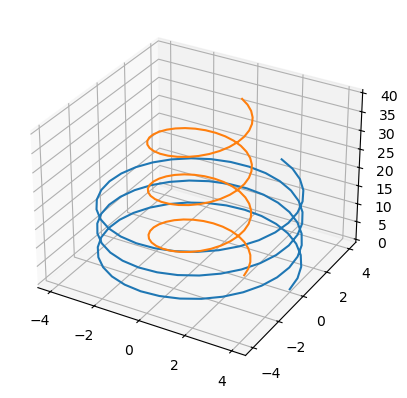

In [24]:
from mpl_toolkits.mplot3d import Axes3D

def spiral(a, b, t):
    x = a * np.cos(t)
    y = a * np.sin(t)
    z = b * t
    return x, y, z

t = np.linspace(0, 20, 100)
x1, y1, z1 = spiral(4, 1, t)
x2, y2, z2 = spiral(2, 2, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1)
ax.plot(x2, y2, z2);

<a href="#back4">Back to Exercise 4</a>